## Profiler with slower motor

### Conduino measurements
Only P20 probe was connected.

#### Stratified water column

900 g salt to bucket 1 (with 18 L, not 16 L)

$\rho_1=1.02946$ at 20.017 C

$\rho_2=0.998916$ at 20.001 C

#### Water samples

|Sample|Density (g cm$^{-3}$)|Temperature ($^{\circ}$C)|Depth (cm)|
|:-:|:-:|:-:|:-:|
|Top|1.01283 |20.033|surface-ish$^*$|
|Shelf break|1.01727| 20.016| 2.85|
|Bottom|1.02607| 20.018| 9.5$^*$|

$^*$Probe does not get to the bottom or surface, there's about 5 mm or more between deepest depth of the probe and bottom, and about 7 mm from the tip of the probe to the surface of the water.

**Using calibration July 6th, not July 12th (that one overestimates density by a lot)**

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.io as sio
import sys
sys.path.append('/ocean/kramosmu/MultipleCanyons/lab/Conduino/scripts')
import conduino_tools as ctools
import profiler_tools as ptools

In [2]:
sns.set_style('whitegrid')
sns.set_context('notebook')

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
def plot_cases(filepaths,labels, strat=False, ini_dens=1.007536):
    fig, (ax0,ax1) = plt.subplots(2,1, figsize=(10,8), sharex=True)
    
    if strat==False:
        ax1.axhline(ini_dens, color='coral', label='density measurment')
    else:
        ax1.axhline(1.01283, color='coral')
        ax1.axhline(1.02607, color='coral', label='density measurment')
    
    sns.set_palette(sns.cubehelix_palette(len(filepaths), start=.5, rot=-.75))
    for filepath, lab in zip(filepaths, labels):
        mat = sio.loadmat(filepath, squeeze_me=True)
        P3 = mat['ch3']
        D3 = ctools.densP_06Jul19(P3)
        time = mat['time']
        ax0.plot(time,P3,'.-', label=lab)
        ax1.plot(time,D3,'.-', label=lab)

    ax0.legend(bbox_to_anchor=(1,1))
    ax1.legend(bbox_to_anchor=(1,1))

    ax0.set_ylabel('reading')
    ax1.set_ylabel('density / g cm$^{-3}$')
    ax0.set_title('P20')
    ax1.set_xlabel('time / s')
    plt.tight_layout()
    return ax0,ax1

Probes P20 profiler

|Channel|Probe|
|::|::|
|'ch3':|P20|


## All profiles

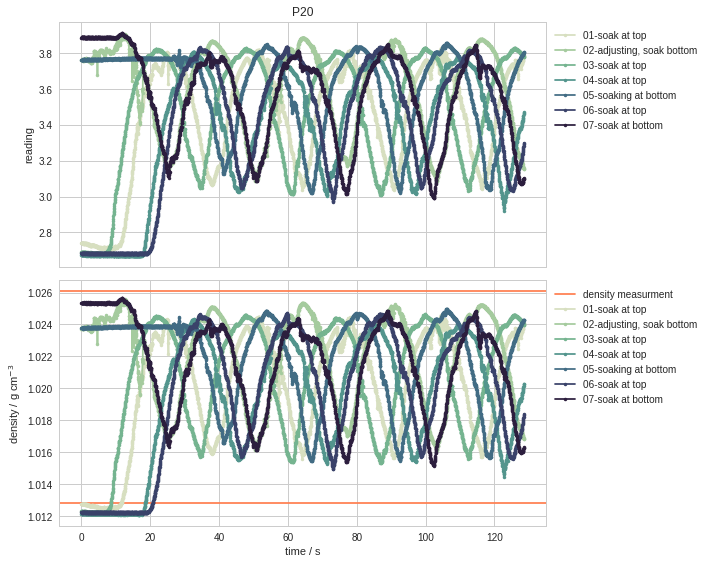

In [10]:
labels = ['01-soak at top','02-adjusting, soak bottom','03-soak at top','04-soak at top',
          '05-soaking at bottom','06-soak at top','07-soak at bottom'] 
   
filepaths = ['../profiler_new_motor_24jul19/profile1.mat',
             '../profiler_new_motor_24jul19/profile2.mat',
             '../profiler_new_motor_24jul19/profile3.mat',
             '../profiler_new_motor_24jul19/profile4.mat',
             '../profiler_new_motor_24jul19/profile5.mat',
             '../profiler_new_motor_24jul19/profile6.mat',
             '../profiler_new_motor_24jul19/profile7.mat',
             
             ]

ax0,ax1 = plot_cases(filepaths, labels,strat=True)

**Soaking at the top**

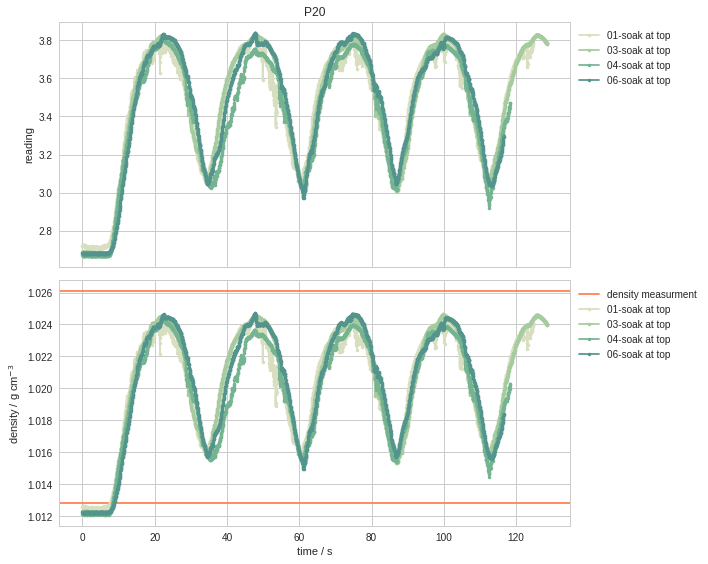

In [11]:
labels = ['01-soak at top','03-soak at top','04-soak at top',
          '06-soak at top'] 
   
filepaths = ['../profiler_new_motor_24jul19/profile1.mat',
             '../profiler_new_motor_24jul19/profile3.mat',
             '../profiler_new_motor_24jul19/profile4.mat',
             '../profiler_new_motor_24jul19/profile6.mat',
             ]

fig, (ax0,ax1) = plt.subplots(2,1, figsize=(10,8), sharex=True)
    
ax1.axhline(1.01283, color='coral')
ax1.axhline(1.02607, color='coral', label='density measurment')
offset = [90,0,240,280]    
sns.set_palette(sns.cubehelix_palette(len(filepaths), start=.5, rot=-.75))
for filepath, lab, offs in zip(filepaths, labels, offset):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P3 = mat['ch3']
    D3 = ctools.densP_06Jul19(P3)
    time = mat['time']
    ax0.plot(time[offs:]-time[offs],P3[offs:],'.-', label=lab)
    ax1.plot(time[offs:]-time[offs],D3[offs:],'.-', label=lab)

ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('reading')
ax1.set_ylabel('density / g cm$^{-3}$')
ax0.set_title('P20')
ax1.set_xlabel('time / s')
plt.tight_layout()

**Soaking at bottom**

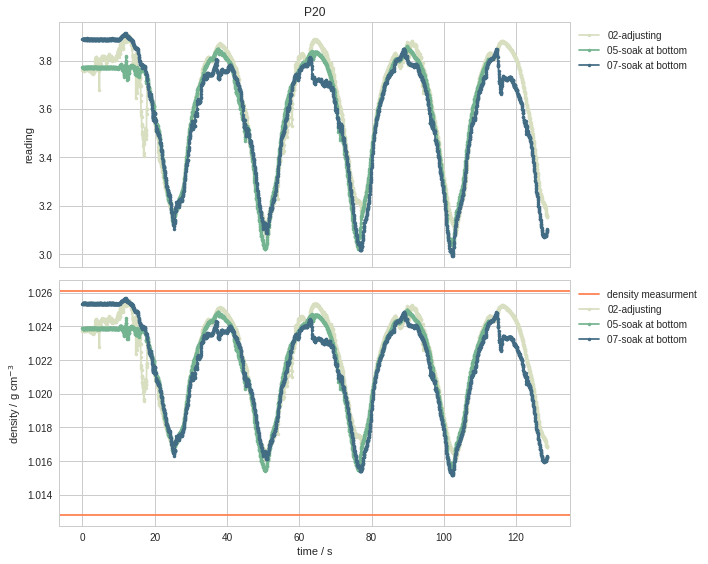

In [12]:
labels = ['02-adjusting','05-soak at bottom','07-soak at bottom'] 
   
filepaths = ['../profiler_new_motor_24jul19/profile2.mat',
             '../profiler_new_motor_24jul19/profile5.mat',
             '../profiler_new_motor_24jul19/profile7.mat',
             ]

fig, (ax0,ax1) = plt.subplots(2,1, figsize=(10,8), sharex=True)
    
ax1.axhline(1.01283, color='coral')
ax1.axhline(1.02607, color='coral', label='density measurment')
offset = [0,380,0]    
sns.set_palette(sns.cubehelix_palette(len(filepaths), start=.5, rot=-.75))
for filepath, lab, offs in zip(filepaths, labels, offset):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P3 = mat['ch3']
    D3 = ctools.densP_06Jul19(P3)
    time = mat['time']
    ax0.plot(time[offs:]-time[offs],P3[offs:],'.-', label=lab)
    ax1.plot(time[offs:]-time[offs],D3[offs:],'.-', label=lab)

ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('reading')
ax1.set_ylabel('density / g cm$^{-3}$')
ax0.set_title('P20')
ax1.set_xlabel('time / s')
plt.tight_layout()

### July 25th

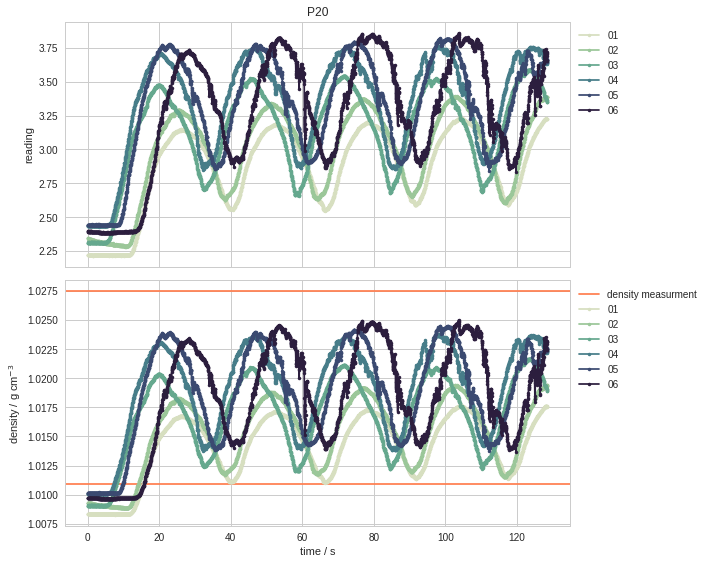

In [14]:
labels = ['01','02','03','04','05','06'] 
   
filepaths = ['../profiler_new_motor_24jul19/profile1_b.mat',
             '../profiler_new_motor_24jul19/profile2_b.mat',
             '../profiler_new_motor_24jul19/profile3_b.mat',
             '../profiler_new_motor_24jul19/profile4_b.mat',
             '../profiler_new_motor_24jul19/profile5_b.mat',
             '../profiler_new_motor_24jul19/profile6_b.mat',
             ]

fig, (ax0,ax1) = plt.subplots(2,1, figsize=(10,8), sharex=True)
    
ax1.axhline(1.01092, color='coral')
ax1.axhline(1.02744, color='coral', label='density measurment')
offset = [0,0,0,0,0,0]    
sns.set_palette(sns.cubehelix_palette(len(filepaths), start=.5, rot=-.75))
for filepath, lab, offs in zip(filepaths, labels, offset):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P3 = mat['ch3']
    D3 = ctools.densP_06Jul19(P3)
    time = mat['time']
    ax0.plot(time[offs:]-time[offs],P3[offs:],'.-', label=lab)
    ax1.plot(time[offs:]-time[offs],D3[offs:],'.-', label=lab)

ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('reading')
ax1.set_ylabel('density / g cm$^{-3}$')
ax0.set_title('P20')
ax1.set_xlabel('time / s')
plt.tight_layout()

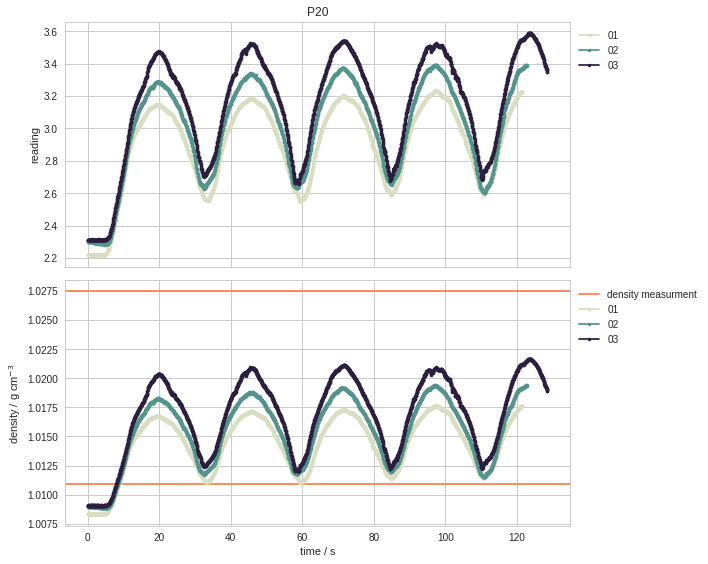

In [32]:
labels = ['01','02','03'] 
   
filepaths = ['../profiler_new_motor_24jul19/profile1_b.mat',
             '../profiler_new_motor_24jul19/profile2_b.mat',
             '../profiler_new_motor_24jul19/profile3_b.mat',
             ]

fig, (ax0,ax1) = plt.subplots(2,1, figsize=(10,8), sharex=True)
    
ax1.axhline(1.01092, color='coral')
ax1.axhline(1.02744, color='coral', label='density measurment')
offset = [160,135,0]    
sns.set_palette(sns.cubehelix_palette(len(filepaths), start=.5, rot=-.75))
for filepath, lab, offs in zip(filepaths, labels, offset):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P3 = mat['ch3']
    D3 = ctools.densP_06Jul19(P3)
    time = mat['time']
    ax0.plot(time[offs:]-time[offs],P3[offs:],'.-', label=lab)
    ax1.plot(time[offs:]-time[offs],D3[offs:],'.-', label=lab)

ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('reading')
ax1.set_ylabel('density / g cm$^{-3}$')
ax0.set_title('P20')
ax1.set_xlabel('time / s')
plt.tight_layout()

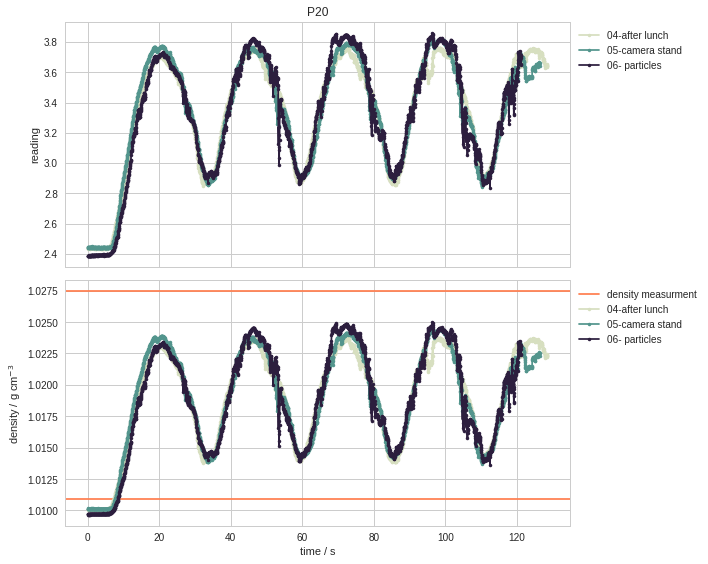

In [39]:
labels = ['04-after lunch','05-camera stand','06- particles'] 
   
filepaths = ['../profiler_new_motor_24jul19/profile4_b.mat',
             '../profiler_new_motor_24jul19/profile5_b.mat',
             '../profiler_new_motor_24jul19/profile6_b.mat',
             ]

fig, (ax0,ax1) = plt.subplots(2,1, figsize=(10,8), sharex=True)
    
ax1.axhline(1.01092, color='coral')
ax1.axhline(1.02744, color='coral', label='density measurment')
offset = [0,50,170]    
sns.set_palette(sns.cubehelix_palette(len(filepaths), start=.5, rot=-.75))
for filepath, lab, offs in zip(filepaths, labels, offset):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P3 = mat['ch3']
    D3 = ctools.densP_06Jul19(P3)
    time = mat['time']
    ax0.plot(time[offs:]-time[offs],P3[offs:],'.-', label=lab)
    ax1.plot(time[offs:]-time[offs],D3[offs:],'.-', label=lab)

ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('reading')
ax1.set_ylabel('density / g cm$^{-3}$')
ax0.set_title('P20')
ax1.set_xlabel('time / s')
plt.tight_layout()